In [3]:
# Importing necessary libraries for feature importance calculation and data processing:
# pandas and numpy for data manipulation, matplotlib for plotting feature importance,
# RandomForestClassifier for computing feature importance scores, 
# and train_test_split for dividing the dataset into training and testing sets.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
# Loading the solar PV fault dataset from a CSV file.
# Separating input features (X) by dropping the target column 'Fault_Flag'.
# Defining the target variable (y) as the 'Fault_Flag' column, which indicates the presence or absence of a fault.
df = pd.read_csv("Realistic_Solar_PV_Fault_100k.csv")
X = df.drop(columns=["Fault_Flag"])
y = df["Fault_Flag"]

In [5]:
# Splitting the dataset into training and testing sets.
# Stratified sampling is used to maintain the class distribution of 'Fault_Flag' in both sets.
# 80% of the data is used for training and 20% for testing.
# random_state is set to 42 for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [6]:
# Initializing the Random Forest Classifier with 100 decision trees and a fixed random state for reproducibility.
# Training the model on the training dataset to learn the patterns for fault classification.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Extracting the feature importance scores from the trained Random Forest model.
# Storing the corresponding feature names from the original dataset for easy mapping.
importances = model.feature_importances_
feature_names = X.columns

In [ ]:
# Creating a DataFrame to organize feature names and their corresponding importance scores.
# Sorting the DataFrame in ascending order to easily visualize and identify the most and least important features.
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

In [10]:
print(importance_df)

                          Feature  Importance
11           Panel_Tilt (degrees)    0.005140
10    Panel_Orientation (degrees)    0.005145
2                       Longitude    0.015299
8           Sun_Azimuth (degrees)    0.015472
1                        Latitude    0.015685
5                      DHI (W/m²)    0.024714
9       Solar_Elevation (degrees)    0.036838
0      PV_Energy_Generation (kWh)    0.062223
7        Ambient_Temperature (°C)    0.065950
3                      GHI (W/m²)    0.115505
6                      POA (W/m²)    0.153523
4                      BNI (W/m²)    0.193826
12  Efficiency_Coefficient (βₚₒₐ)    0.290679


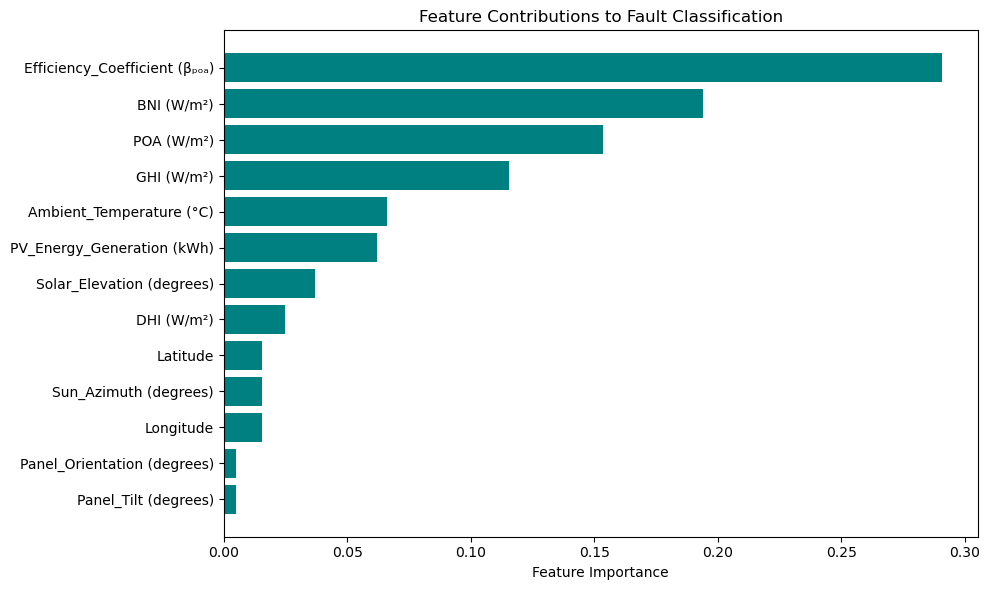

In [9]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel("Feature Importance")
plt.title("Feature Contributions to Fault Classification")
plt.tight_layout()
plt.show()